# Feature Scaling

## Example Problem

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

In this example the price of the house not only depends on the feature *size* but also on *number of bedroom, number of floor* and *age of home*. In total there are **4 features**. The number of given **traning examples** are **3**.

In [83]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import numpy.typing as npt

get_ipython().run_line_magic('matplotlib', 'notebook')

## Traning data

In [84]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

size:        [2104 1416  852]
num_bedroom: [5 3 2]


<IPython.core.display.Javascript object>


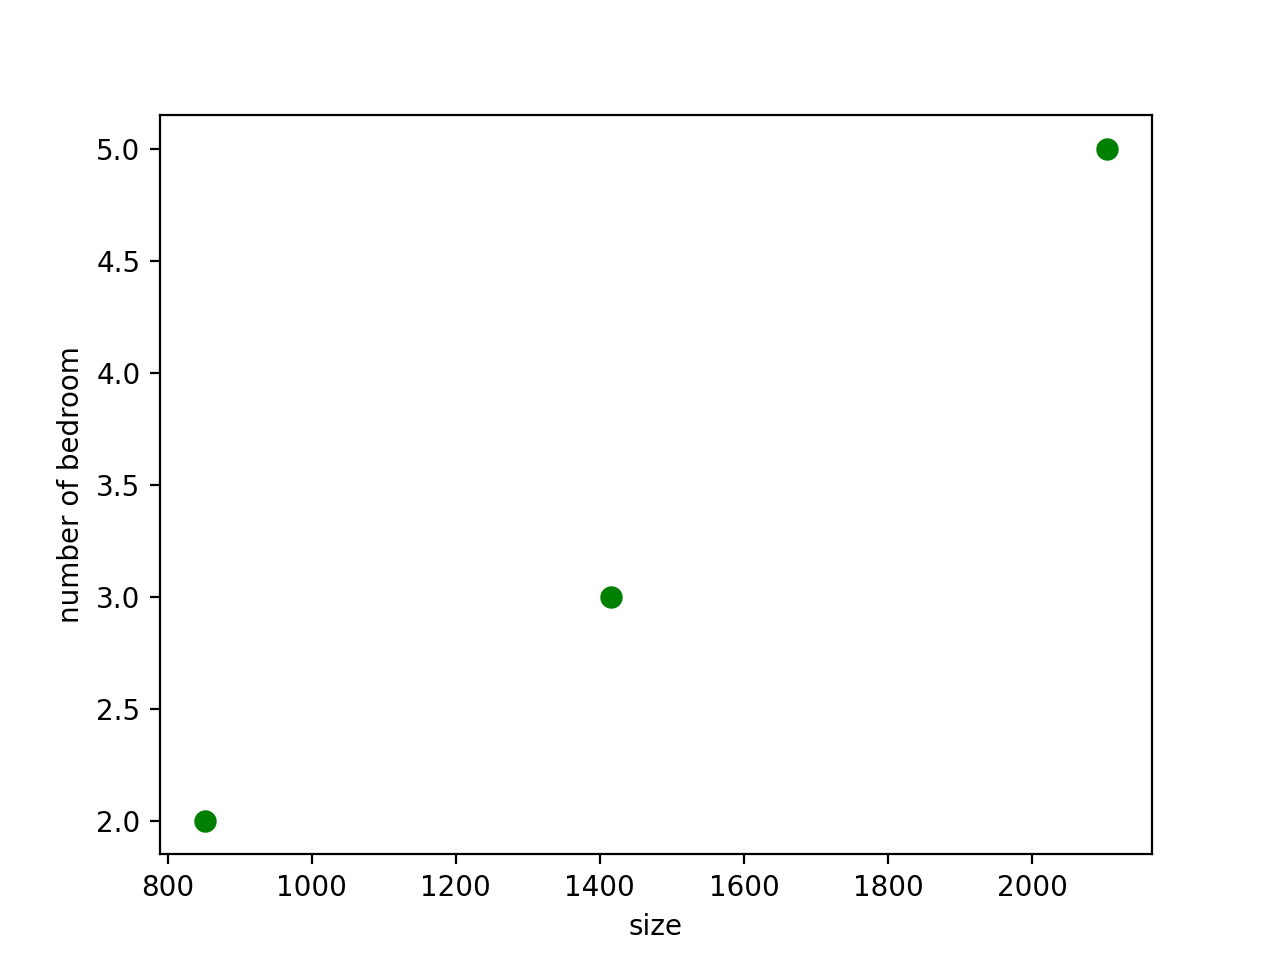

In [96]:
size = X_train[:,0]
num_bedroom = X_train[:,1]

print(f'size:        {size}')
print(f'num_bedroom: {num_bedroom}')

ax = plt.axes()

ax.scatter(size, num_bedroom, marker='o', c="green", s=50)

ax.set_xlabel('size')
ax.set_ylabel('number of bedroom')

plt.show()

## Mean Normalization

$$ \mathbf{x}_j = \frac{\mathbf{x}_j - \mu_j}{x_{j,max} - x_{j,min}} \tag{1} \ ,$$

where $\mu_n$ is the mean value of the feature vector $\mathbf{x}_j$ over all training examples.

size_mean_norm:        [ 0.51650692 -0.03301384 -0.48349308]
num_bedroom_mean_norm: [ 0.55555556 -0.11111111 -0.44444444]


<IPython.core.display.Javascript object>


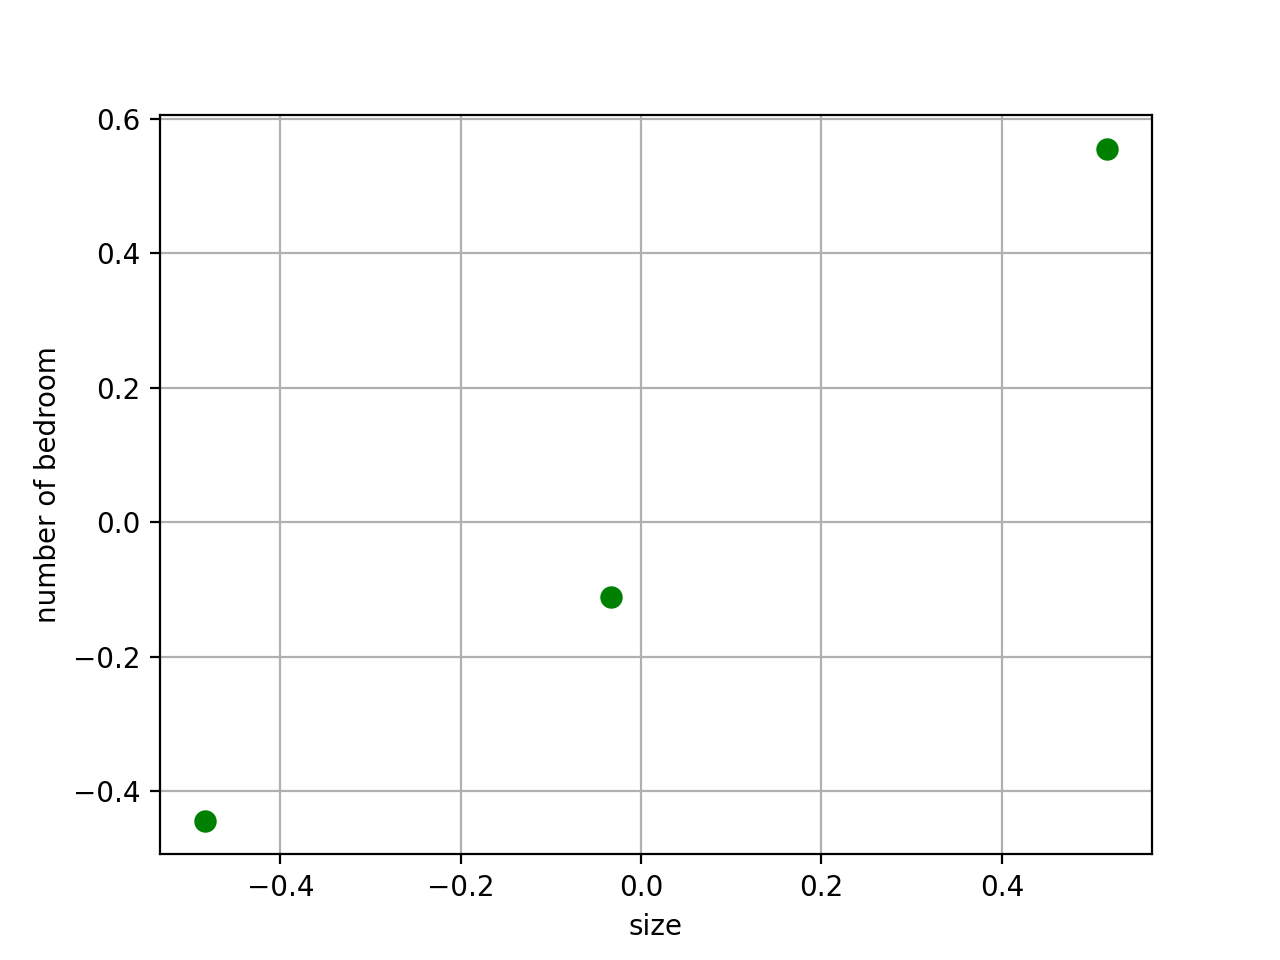

In [97]:
mu_1 = np.mean(size)
mu_2 = np.mean(num_bedroom)

size_mean_norm = (size-mu_1)/(np.max(size) - np.min(size))
num_bedroom_mean_norm = (num_bedroom-mu_2)/(np.max(num_bedroom) - np.min(num_bedroom))

print(f'size_mean_norm:        {size_mean_norm}')
print(f'num_bedroom_mean_norm: {num_bedroom_mean_norm}')

ax = plt.axes()

ax.scatter(size_mean_norm, num_bedroom_mean_norm, marker='o', c="green", s=50)

ax.set_xlabel('size')
ax.set_ylabel('number of bedroom')
ax.grid(True, which='both')

plt.show()

## Z-Score Normalization

$$ \mathbf{x}_j = \frac{\mathbf{x}_j - \mu_j}{\sigma_n} \tag{2} \ ,$$

where $\mu_n$ is the mean value and $\sigma_n$ is the standard deviation of the feature vector $\mathbf{x}_j$ over all training examples.

In [87]:
mu_1 = np.mean(size)
mu_2 = np.mean(num_bedroom)

sigma_1 = np.std(size)
sigma_2 = np.std(num_bedroom)

size_zscore_norm = (size-mu_1)/sigma_1
num_bedroom_zscore_norm = (num_bedroom-mu_2)/sigma_2

print(f'size_zscore_norm:        {size_zscore_norm}')
print(f'num_bedroom_zscore_norm: {num_bedroom_zscore_norm}')

ax = plt.axes()

ax.scatter(size_zscore_norm, num_bedroom_zscore_norm, marker='o', c="green", s=50)

ax.set_xlabel('size')
ax.set_ylabel('number of bedroom')
ax.grid(True, which='both')

plt.show()

size_zscore_norm:        [ 1.26311506 -0.08073519 -1.18237987]
num_bedroom_zscore_norm: [ 1.33630621 -0.26726124 -1.06904497]


## Normalize Feature Vector

In [98]:
print(f'X_train: \n {X_train} \n')

X_train_norm = np.zeros([X_train.shape[0],X_train.shape[1]])

for i in range(X_train.shape[1]):
    mu = 0
    sigma = 0
    
    mu = np.mean(X_train[:,i])
    sigma = np.std(X_train[:,i])
    
    X_train_norm[:,i] = (X_train[:,i] - mu)/sigma
    
print(f'X_train_norm: \n {X_train_norm}')

X_train: 
 [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]] 

X_train_norm: 
 [[ 1.26311506  1.33630621 -0.70710678  1.22474487]
 [-0.08073519 -0.26726124  1.41421356  0.        ]
 [-1.18237987 -1.06904497 -0.70710678 -1.22474487]]


## Define Cost-Function

In [99]:
def compute_cost(X,y,w,b):

    m = X.shape[0] # number of training examples
    
    sum_cost = 0
    
    for i in range(m):
        fwb = np.dot(w,X[i])+ b
        sum_i = (fwb - y[i])**2
        sum_cost = sum_cost + sum_i

    cost_value = sum_cost/(2*m)
    
    return cost_value

## Define Function for Gradient Caluclation

In [100]:
def compute_gradient(X,y,w,b):
    
    m = X.shape[0] # number of training examples
    n = X.shape[1] # number of features
    
    sum_dw = np.zeros(n)
    sum_db = 0
    
    for i in range(m):
        cost = np.dot(w,X[i])+ b - y[i]
        sum_db += cost
        for j in range(n):
            sum_dw[j] = sum_dw[j] + cost * X[i,j]
        
    dj_dw = sum_dw/m    
    dj_db = sum_db/m
    
    return dj_db, dj_dw

## Define Gradient Descent Function for Optimizating the Parameter

In [101]:
def gradient_descent(X,y,w_init,b_init,alpha,cost_function,gradient_function,num_iter):
    
    w = w_init
    b = b_init
    J_history = []
    w_history = []
    b_history = []
    
    for i in range(num_iter):
        # compute cost value
        J_history.append(compute_cost(X,y,w,b))
        
        # compute gradient
        dj_db, dj_dw = compute_gradient(X,y,w,b)
        
        # update parameter w and b
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        w_history.append(w)
        b_history.append(b)
        
    return w, b, J_history, w_history, b_history

## Run Gradient Descent Algorithm

In [165]:
X = X_train_norm
y = y_train

b_init = 0.
w_init = np.array([ 1, 1, 1, 1])

cost_function = compute_cost
gradient_function = compute_gradient

alpha = 1e-6
num_iter = 50000

w,b,J_history,w_history, b_history = gradient_descent(X,y,w_init,b_init,alpha,cost_function,gradient_function,num_iter)

## Optimized Parameter Value Pair

In [166]:
print(f'Optimized values for w : {w}')
print(f'Optimized value for b : {b:0.3f}')

Optimized values for w : [ 6.3061085   6.48509551 -1.0032141   6.20022912]
Optimized value for b : 14.143


## Comparison Predicted vs. Target Values

In [167]:
for i in range(X_train.shape[0]):
    y_pred = np.dot(w,X_train[i])+ b
    print(f'Predicted value: {y_pred:0.1f}, target value: {y_train[i]}')

Predicted value: 13592.6, target value: 460
Predicted value: 9209.1, target value: 232
Predicted value: 5615.9, target value: 178


## Visualize Cost-Function

<IPython.core.display.Javascript object>


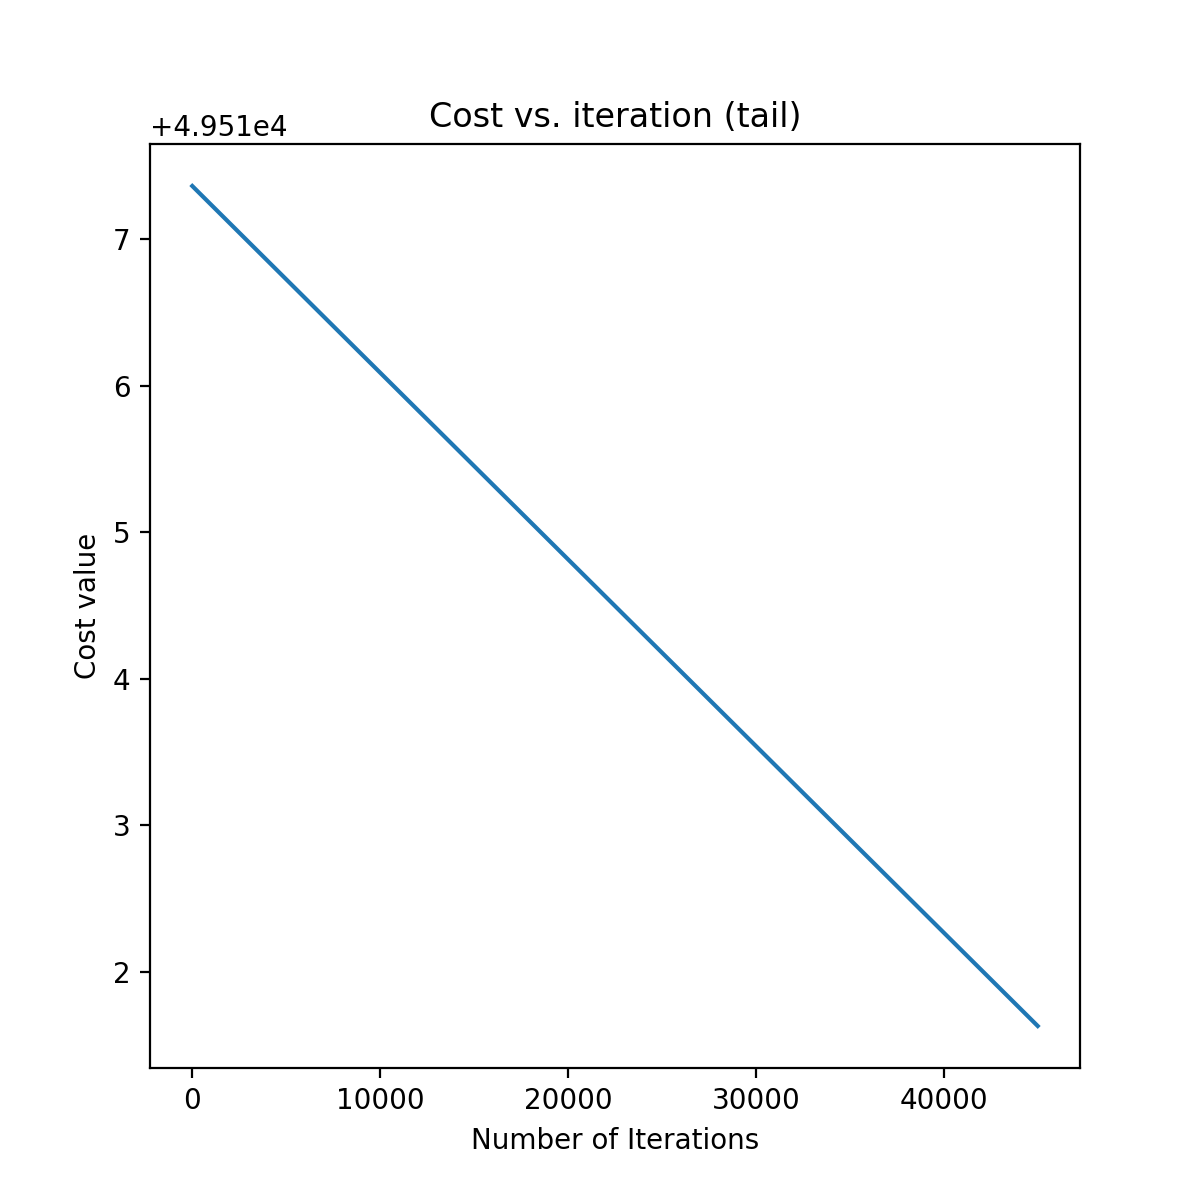

In [145]:
plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(np.arange(len(J_history[5000:])),J_history[5000:])

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost value')
ax.set_title("Cost vs. iteration (tail)")

plt.show()